<a href="https://colab.research.google.com/github/rikdantas/Aprendizagem-de-Maquinas/blob/main/Lista_1/Lista1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esse notebook foi criado para a resolução lista 1 da disciplina: DCA0133 - APRENDIZAGEM DE MÁQUINA E MINERAÇÃO DE DADOS

**Aluno: Paulo Ricardo Dantas**

# Questões


## Questão 2
 Um determinado banco deve decidir se um cliente deve ou não receber um empréstimo bancário em função da sua condição de bom ou mau pagador. Considerando os dados de treinamento abaixo, aplique o classificador, no caso uma árvore de decisão, para atribuir a classe (rótulo) para o registro 12

 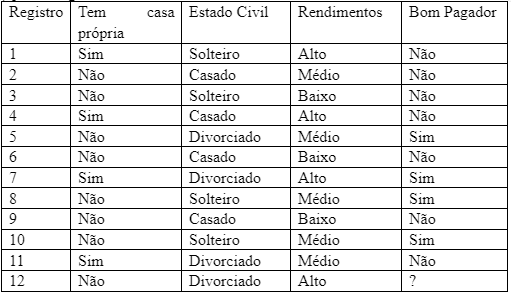


In [3]:
# Importando bibliotecas
import gdown
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
import graphviz

### Importando o dataset


In [ ]:
url = "https://drive.google.com/uc?id=1o3EYzi39Ng6iBNTS-CPK978oEcjI6am7"
output = "Questao2_L1.csv"
gdown.download(url, output)

In [24]:
# Lendo o dataset e mostrando um preview
dados_questao2 = pd.read_csv("Questao2_L1.csv")
dados_questao2.head()

,Registro,Tem casa\nprópria,Estado Civil,Rendimentos,Bom Pagador
0,1,Sim,Solteiro,Alto,Não
1,2,Não,Casado,Médio,Não
2,3,Não,Solteiro,Baixo,Não
3,4,Sim,Casado,Alto,Não
4,5,Não,Divorciado,Médio,Sim


### Pré-processamento dos dados

In [25]:
# Transformando dados categóricos em dados numéricos
mapeamento_tem_casa_propria = {'Não': 0, 'Sim': 1}
mapeamento_estado_civil = {'Solteiro': 0, 'Casado': 1, 'Divorciado': 2}
mapeamento_rendimentos = {'Baixo': 0, 'Médio': 1, 'Alto': 2}
mapeamento_bom_pagador = {'Não': 0, 'Sim': 1}

# Aplicando os mapeamentos para as colunas correspondentes
dados_questao2['Tem casa\nprópria'] = dados_questao2['Tem casa\nprópria'].map(mapeamento_tem_casa_propria)
dados_questao2['Estado Civil'] = dados_questao2['Estado Civil'].map(mapeamento_estado_civil)
dados_questao2['Rendimentos'] = dados_questao2['Rendimentos'].map(mapeamento_rendimentos)
dados_questao2['Bom Pagador'] = dados_questao2['Bom Pagador'].map(mapeamento_bom_pagador)

dados_questao2.head()

,Registro,Tem casa\nprópria,Estado Civil,Rendimentos,Bom Pagador
0,1,1,0,2,0
1,2,0,1,1,0
2,3,0,0,0,0
3,4,1,1,2,0
4,5,0,2,1,1


In [28]:
# Separando os dados em features (X) e target (y)
X = dados_questao2.drop(columns=['Bom Pagador', 'Registro'])
y = dados_questao2['Bom Pagador']

### Criando o modelo

In [ ]:
classificador = DecisionTreeClassifier()
classificador.fit(X, y)

### Usando o modelo


In [ ]:
registro_12 = [[0, 2, 2]]  # Não tem casa própria, é divorciado e tem rendimento alto
previsao = classificador.predict(registro_12)

In [37]:
if(previsao[0]):
  print("Se a pessoa não tem casa própria, é divorciado, tem rendimento alto, então é bom pagador")
else:
  print("Se a pessoa não tem casa própria, é divorciado, tem rendimento alto, então não é bom pagador")

Se a pessoa não tem casa própria, é divorciado, tem rendimento alto, então é bom pagador


### Visualizando a árvore de decisão


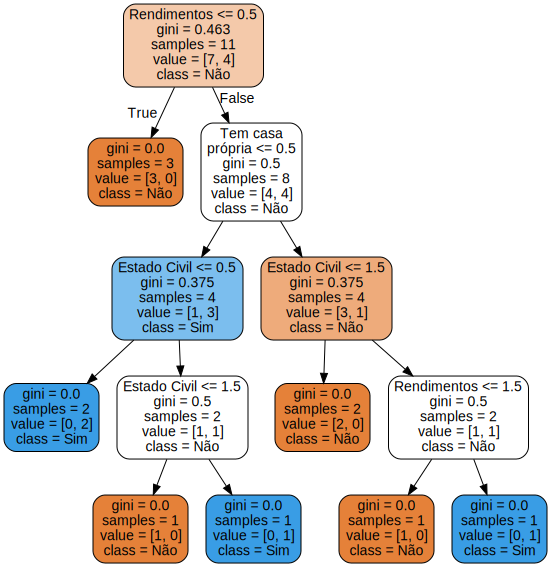

In [38]:
# Exportar a árvore de decisão para um arquivo .dot
export_graphviz(classificador, out_file='arvore_decisional.dot',
                feature_names=X.columns, class_names=['Não', 'Sim'],
                filled=True, rounded=True)

# Converter o arquivo .dot em um arquivo .png
!dot -Tpng arvore_decisional.dot -o arvore_decisional.png

# Exibir a árvore de decisão
graphviz.Source.from_file('arvore_decisional.dot')

# Trabalhos


## Trabalho 1
Pesquise e apresente um trabalho sobre o algoritmo Naïve-Bayes para a detecção
(classificação) de Spam em mensagens de email

- OBS: Para a realização desse trabalho foi utilizado um dataset de emails que está disponivel no link a seguir: <https://github.com/NStugard/Intro-to-Machine-Learning/blob/main/spam.csv>

In [ ]:
# Importando bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Importando o dataset


In [ ]:
# Lendo o dataset e mostrando um preview
df = pd.read_csv('https://raw.githubusercontent.com/NStugard/Intro-to-Machine-Learning/main/spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Mostrando o tamanho do dataset
print("Quantidade de linhas do dataset:", df.shape[0])

Quantidade de linhas do dataset: 5572


### Dividindo os dados em dados para treinamento e dados para teste

In [ ]:
X = df['Message']  # Recursos
Y = df['Category']    # Rótulos

# Dividindo os dados em conjunto de treinamento e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=42)

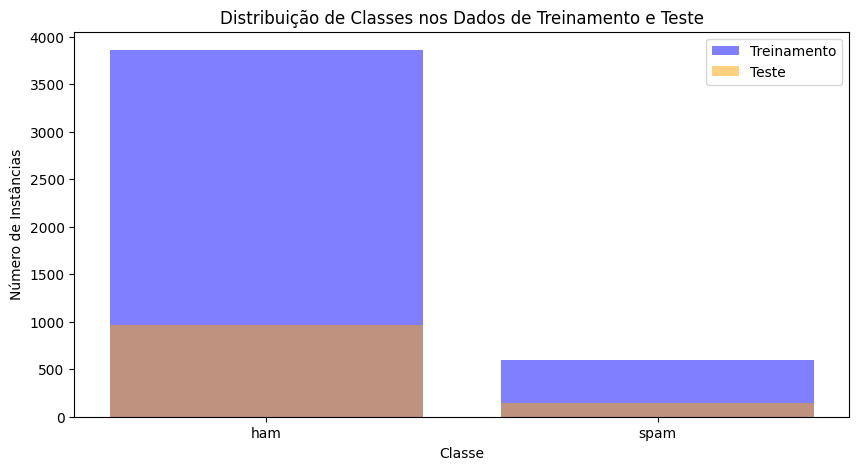

In [ ]:
# Contando o número de instâncias de cada classe nos conjuntos de treinamento e teste
train_counts = Y_treino.value_counts()
test_counts = Y_teste.value_counts()

# Criando um gráfico de barras
plt.figure(figsize=(10, 5))

# Dados de treinamento
plt.bar(train_counts.index, train_counts.values, alpha=0.5, label='Treinamento', color='blue')

# Dados de teste
plt.bar(test_counts.index, test_counts.values, alpha=0.5, label='Teste', color='orange')

plt.xlabel('Classe')
plt.ylabel('Número de Instâncias')
plt.title('Distribuição de Classes nos Dados de Treinamento e Teste')
plt.legend()
plt.show()

### Vetorização
Como foi instruído no próprio trabalho, é necessário que se faça a vetorização das mensagens, pois o algoritmo de Naive-Bayes trabalha com dados numéricos. Ou seja, vetorizar seria transformar as mensagens em números.

In [ ]:
# Vetorizando as mensagens de e-mail
vetorizador = CountVectorizer()
X_treino_vetorizado = vetorizador.fit_transform(X_treino)
X_teste_vetorizado = vetorizador.transform(X_teste)

### Criando modelo
Para criar o modelo de Naive-Bayes vai ser utilizado o método também falado na lista, o MultinomialNB().

In [ ]:
# Criando e treinando o modelo Naïve-Bayes
modelo_NB = MultinomialNB()
modelo_NB.fit(X_treino_vetorizado, Y_treino)

MultinomialNB()

### Usando o modelo
Agora que o modelo está criado usando os dados de teste, precisamos fazer previsões usando o modelo e testá-las.

In [ ]:
# Fazendo previsões com o modelo treinado
previsoes = modelo_NB.predict(X_teste_vetorizado)

### Verificando eficácia do modelo
Para verificar a eficácia do modelo iremos usar duas funções já implementadas da biblioteca sklearn que é a accuracy_score e a confusion_matrix.

In [ ]:
# Avaliando a precisão do modelo
precisao = accuracy_score(Y_teste, previsoes)
print("Precisão do modelo Naïve-Bayes:", precisao)


Precisão do modelo Naïve-Bayes: 0.9919282511210762


In [ ]:
# Matriz de confusão
matriz_confusao = confusion_matrix(Y_teste, previsoes)
print("\nMatriz de Confusão:")
print(matriz_confusao)


Matriz de Confusão:
[[966   0]
 [  9 140]]


Note que essa matriz de confusão não é tão bem explicativa, por isso iremos plotar um gráfico para ajudar em uma melhor visualização.

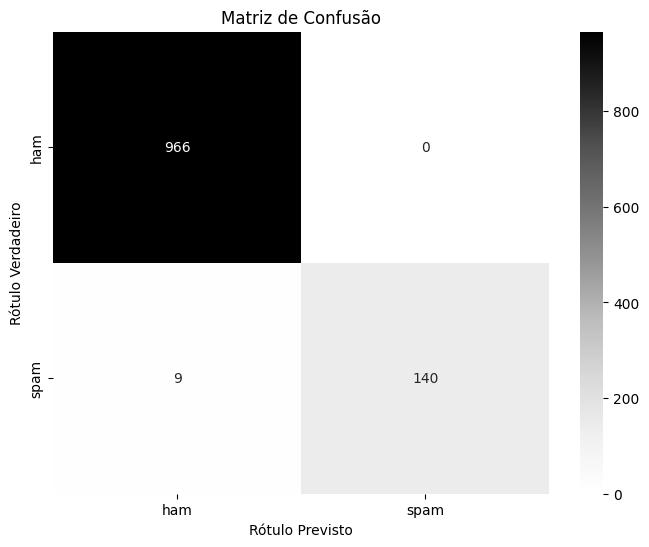

In [ ]:
# Plotando a matriz de confusão como um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Greys', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

## Trabalho 2
Pesquise e apresente um trabalho sobre Random Forest para inferir o preço de uma casa (regressão) baseado em atributos como área do terreno, número de quartos, número de banheiros, etc.
- OBS: Para a realização desse trabalho foi utilizado um dataset de preços de casa que está disponivel no link a seguir: <https://www.kaggle.com/datasets/ashydv/housing-dataset>


In [ ]:
# Importando bibliotecas
import gdown
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Importando o dataset

In [ ]:
url = "https://drive.google.com/uc?id=1mUV9zSS1UZw_r9kKUsJlfuAKHO8fOOSR"
output = "Housing.csv"
gdown.download(url, output)

Downloading...
From: https://drive.google.com/uc?id=1mUV9zSS1UZw_r9kKUsJlfuAKHO8fOOSR
To: /content/Housing.csv
100%|██████████| 30.0k/30.0k [00:00<00:00, 12.4MB/s]


'Housing.csv'

In [ ]:
# Lendo o dataset e mostrando um preview
housing_data = pd.read_csv("Housing.csv")
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Mostrando o tamanho do dataset
print("Quantidade de linhas do dataset:", housing_data.shape[0])

Quantidade de linhas do dataset: 545


### Pré-processamento dos dados
Nessa etapa as variáveis categóricas vão ser codificadas usando a função LabelEncoder, mas antes disso iremos transformar a coluna furnishingstatus em 3 novas colunas, para captar todos os tipos de ocorrencia do dataset.

In [ ]:
# Aplicar codificação one-hot à coluna 'furnishingstatus'
housing_data = pd.get_dummies(housing_data, columns=['furnishingstatus'])

In [ ]:
label_encoder = LabelEncoder()
housing_data['mainroad'] = label_encoder.fit_transform(housing_data['mainroad'])
housing_data['guestroom'] = label_encoder.fit_transform(housing_data['guestroom'])
housing_data['basement'] = label_encoder.fit_transform(housing_data['basement'])
housing_data['hotwaterheating'] = label_encoder.fit_transform(housing_data['hotwaterheating'])
housing_data['airconditioning'] = label_encoder.fit_transform(housing_data['airconditioning'])
housing_data['prefarea'] = label_encoder.fit_transform(housing_data['prefarea'])
housing_data['furnishingstatus_furnished'] = label_encoder.fit_transform(housing_data['furnishingstatus_furnished'])
housing_data['furnishingstatus_semi-furnished'] = label_encoder.fit_transform(housing_data['furnishingstatus_semi-furnished'])
housing_data['furnishingstatus_unfurnished'] = label_encoder.fit_transform(housing_data['furnishingstatus_unfurnished'])

In [ ]:
# Mostrando como ficou o dataset
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


### Dividindo os dados em dados para treinamento e dados para teste

In [ ]:
# Dividir os dados em conjunto de treinamento e teste
X = housing_data.drop(columns=['price'])
y = housing_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Verificando conjuntos de treinamento e teste
print("Conjunto de Treinamento - X:", X_train.shape, " y:", y_train.shape)
print("Conjunto de Teste - X:", X_test.shape, " y:", y_test.shape)

Conjunto de Treinamento - X: (436, 14)  y: (436,)
Conjunto de Teste - X: (109, 14)  y: (109,)


### Criando modelo
Para criar o modelo, iremos usar o n_estimators = 1000, que seria o número de árvores geradas.

In [ ]:
# Inicializar e treinar o modelo Random Forest
random_forest = RandomForestRegressor(n_estimators=1000, random_state=10)
random_forest.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = random_forest.predict(X_test)

### Verificando eficácia do modelo

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Erro Quadrático Médio (MSE):", mse)
print("Coeficiente de Determinação (R2 Score):", r2)

Erro Quadrático Médio (MSE): 1015351148916.8893
Coeficiente de Determinação (R2 Score): 0.6388809945945167


### Caso teste

In [ ]:
# Suponha que você tenha as características de um novo imóvel
test_house = {
    'area': 500,
    'bedrooms': 2,
    'bathrooms': 1,
    'stories': 0,
    'mainroad': 'no',
    'guestroom': 'no',
    'basement': 'no',
    'hotwaterheating': 'no',
    'airconditioning': 'yes',
    'parking': 1,
    'prefarea': 'no',
    'furnishingstatus_furnished' : '1',
    'furnishingstatus_semi-furnished' : '0',
    'furnishingstatus_unfurnished' : '0'
}

# Codificar variáveis categóricas
for feature in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus_furnished','furnishingstatus_semi-furnished','furnishingstatus_unfurnished']:
    if feature in test_house:
        test_house[feature] = label_encoder.transform([test_house[feature]])[0]

# Criar um DataFrame com os dados do novo imóvel
test_house_df = pd.DataFrame([test_house])

# Fazer a predição do preço do novo imóvel
predicted_price = random_forest.predict(test_house_df)

print("Preço previsto do novo imóvel:", predicted_price[0])

Preço previsto do novo imóvel: 3873554.65
